In [1]:
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
crypto_path = "crypto_data.csv"

In [12]:
#Read in initial CSV
initial_df = pd.read_csv(crypto_path)
initial_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [13]:
#Use .loc to add filter for traded cryptos
trade_df = initial_df.loc[initial_df['IsTrading']==True,:]
trade_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [14]:
#Filter out columns that don't have numericdata
trade_df2 = trade_df.drop(columns=["IsTrading", "CoinName", "Unnamed: 0"])

In [16]:
#Drop nulls from the table
full_df = trade_df2.dropna()
full_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000


In [17]:
#Add filter for only coins that have been mined
mine_df = full_df.loc[(full_df["TotalCoinsMined"] > 0)]
mine_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [18]:
#Use get_dummies to create dummy variables and standardize table
final_df = pd.get_dummies(mine_df[['Algorithm', 'ProofType']])
final_df

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Scale the data to standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df)

In [37]:
#Use PCA to perform dimensionality reduction
pca = PCA(n_components=0.99)
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[ 1.9715066 , -0.10474654, -0.22528528, ..., -0.1027852 ,
         0.13306804, -0.10583791],
       [ 1.9299968 , -0.06808444, -0.22806697, ..., -0.10500617,
         0.13365068, -0.10641395],
       [ 3.0551336 ,  0.6891274 , -0.1535278 , ..., -0.23124224,
        -0.33191603, -0.0104945 ],
       ...,
       [-3.025247  , -1.6564142 , -0.07089736, ...,  0.02191777,
         0.31545463,  0.07903076],
       [-2.6312606 , -0.4008449 , -0.18123358, ..., -0.06388948,
         0.31967202,  0.09348717],
       [ 0.32095787,  1.478514  , -0.25803927, ...,  0.5418918 ,
         1.0239593 , -0.05791906]], dtype=float32)

In [38]:
#Further reduce with t-SNE
tsne = TSNE(learning_rate=150)
tsne_features = tsne.fit_transform(pca_data)
tsne_features

array([[-13.836331 , -11.239785 ],
       [-13.312632 , -10.468273 ],
       [-23.870407 , -22.813728 ],
       ...,
       [ 16.789492 , -22.181726 ],
       [ 16.421936 , -11.464646 ],
       [  0.6774927,  11.278572 ]], dtype=float32)

In [39]:
final_df['x'] = tsne_features[:,0]
final_df['y'] = tsne_features[:,1]

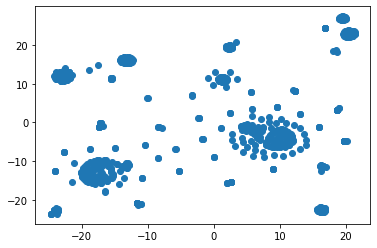

In [43]:
#Use Scatter plot to show results
plt.scatter(final_df['x'], final_df['y'])
plt.show()

# Cluster Analysis

There appear to be multiple clusters in the plot. Specifically, there are two larger clusters with 2-3 smaller groupings around them. 